In [1]:
import enum
from enum import Enum
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse
import scipy.special
import scipy.stats

In [2]:
plt.rcParams["font.sans-serif"] = "Source Han Sans SC"
plt.rcParams["figure.dpi"] = 300

In [3]:
def 计算投出至少若干枚特定类型通宝的概率(*, 钱盒容量: int, 特定类型通宝的数量: int, 投钱个数: int, 需求数量: int) -> float:
    rv = scipy.stats.hypergeom(M=钱盒容量, n=特定类型通宝的数量, N=投钱个数)
    prob = rv.sf(需求数量 - 1)

    return prob

# 游客分队

In [4]:
游客分队钱盒容量 = 12
游客分队投钱个数 = 5


def 计算游客分队1次循环源石锭增加量的期望(*, 衡钱数量: int, 厉钱数量: int) -> float:
    投出至少1枚衡钱的概率 = 计算投出至少若干枚特定类型通宝的概率(钱盒容量=游客分队钱盒容量, 特定类型通宝的数量=衡钱数量, 投钱个数=游客分队投钱个数, 需求数量=1)
    投出至少2枚厉钱的概率 = 计算投出至少若干枚特定类型通宝的概率(钱盒容量=游客分队钱盒容量, 特定类型通宝的数量=厉钱数量, 投钱个数=游客分队投钱个数, 需求数量=2)
    with np.errstate(divide='ignore'):
        _1次循环源石锭增加量的期望 = 5 * 65 - 5 * 50 * (1 / 投出至少1枚衡钱的概率) - 50 * (1 / 投出至少2枚厉钱的概率)
    return _1次循环源石锭增加量的期望


结果矩阵 = np.full((游客分队钱盒容量 + 1, 游客分队钱盒容量 + 1), np.nan)
for 衡钱数量 in range(游客分队钱盒容量 + 1):
    for 厉钱数量 in range(游客分队钱盒容量 + 1):
        if 衡钱数量 + 厉钱数量 <= 游客分队钱盒容量:
            结果矩阵[衡钱数量, 厉钱数量] = 计算游客分队1次循环源石锭增加量的期望(衡钱数量=衡钱数量, 厉钱数量=厉钱数量)


df = pd.DataFrame(结果矩阵,
                       index=[衡钱数量 for 衡钱数量 in range(结果矩阵.shape[0])],
                       columns=[厉钱数量 for 厉钱数量 in range(结果矩阵.shape[1])])
df.index.name = "衡钱数量"
df.columns.name = "厉钱数量"
print("游客分队1次循环源石锭增加量的期望")
df.round(2)

游客分队1次循环源石锭增加量的期望


厉钱数量,0,1,2,3,4,5,6,7,8,9,10,11,12
衡钱数量,,,,,,,,,,,,,
0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,-inf,-inf,-605.00,-412.50,-361.84,-341.44,-331.90,-327.38,-325.51,-325.00,-325.00,-325.0,NaN
2,-inf,-inf,-371.67,-179.17,-128.51,-108.11,-98.56,-94.05,-92.18,-91.67,-91.67,NaN,NaN
3,-inf,-inf,-302.30,-109.80,-59.14,-38.74,-29.19,-24.68,-22.81,-22.30,NaN,NaN,NaN
4,-inf,-inf,-274.02,-81.52,-30.86,-10.46,-0.92,3.60,5.47,NaN,NaN,NaN,NaN
5,-inf,-inf,-261.81,-69.31,-18.65,1.75,11.29,15.81,NaN,NaN,NaN,NaN,NaN
6,-inf,-inf,-256.91,-64.41,-13.75,6.65,16.20,NaN,NaN,NaN,NaN,NaN,NaN
7,-inf,-inf,-255.32,-62.82,-12.16,8.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-inf,-inf,-255.00,-62.50,-11.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 后勤分队

In [5]:
后勤分队钱盒容量 = 10
后勤分队投钱个数 = 3

投出茧成绢的概率 = 计算投出至少若干枚特定类型通宝的概率(钱盒容量=后勤分队钱盒容量, 特定类型通宝的数量=1, 投钱个数=后勤分队投钱个数, 需求数量=1)


def 计算后勤分队1次循环源石锭增加量的期望(*, 厉钱数量: int) -> float:
    投出至少2枚厉钱的概率 = 计算投出至少若干枚特定类型通宝的概率(钱盒容量=后勤分队钱盒容量, 特定类型通宝的数量=厉钱数量, 投钱个数=后勤分队投钱个数, 需求数量=2)
    with np.errstate(divide='ignore'):
        _1次循环源石锭增加量的期望 = 30 * 投出茧成绢的概率 * 99 - 6 * 50 * (1 / 投出至少2枚厉钱的概率)
    return _1次循环源石锭增加量的期望


结果数组 = np.full(后勤分队钱盒容量 + 1, np.nan)
for 厉钱数量 in range(后勤分队钱盒容量 + 1):
    if 厉钱数量 + 1 <= 后勤分队钱盒容量:
        结果数组[厉钱数量] = 计算后勤分队1次循环源石锭增加量的期望(厉钱数量=厉钱数量)


df = pd.DataFrame(结果数组, index=[厉钱数量 for 厉钱数量 in range(结果数组.shape[0])], columns=["后勤分队1次循环源石锭增加量的期望"])
df.index.name = "厉钱数量"
print("后勤分队1次循环源石锭增加量的期望")
df.round(2)

后勤分队1次循环源石锭增加量的期望


,后勤分队1次循环源石锭增加量的期望
厉钱数量,
0,-inf
1,-inf
2,-3609.00
3,-745.36
4,-9.00
5,291.00
6,441.00
7,523.65
8,569.57


In [6]:
后勤分队钱盒容量 = 10
后勤分队投钱个数 = 3

投出茧成绢的概率 = 计算投出至少若干枚特定类型通宝的概率(钱盒容量=后勤分队钱盒容量, 特定类型通宝的数量=1, 投钱个数=后勤分队投钱个数, 需求数量=1)


def 增加1次源石锭(初始源石锭数量: int) -> int:
    return 初始源石锭数量 + min(初始源石锭数量 // 4, 99)


type 状态类 = 过渡态类 | 吸收态类


class 过渡态类(NamedTuple):
    源石锭数量: int
    烛火数量: int
    票券可投钱次数: int


class 吸收态类(Enum):
    源石锭达到阈值 = enum.auto()


class 求解器类:
    def __init__(self, *, 电表倒转成功源石锭阈值: int, 厉钱数量: int, 每次投钱消耗票券数量: int):
        self.电表倒转成功源石锭阈值: int = 电表倒转成功源石锭阈值
        self.厉钱数量: int = 厉钱数量
        self.每次投钱消耗票券数量: int = 每次投钱消耗票券数量

        self.投出至少2枚厉钱的概率 = 计算投出至少若干枚特定类型通宝的概率(钱盒容量=后勤分队钱盒容量, 特定类型通宝的数量=厉钱数量, 投钱个数=后勤分队投钱个数, 需求数量=2)
        self.投出至少2枚厉钱所需投钱次数的分布 = scipy.stats.geom(p=self.投出至少2枚厉钱的概率)

    def 获取状态(self, *, 源石锭数量: int, 烛火数量: int, 票券可投钱次数: int) -> 状态类:
        if 源石锭数量 >= self.电表倒转成功源石锭阈值:
            return 吸收态类.源石锭达到阈值
        else:
            return 过渡态类(源石锭数量=源石锭数量, 烛火数量=烛火数量, 票券可投钱次数=票券可投钱次数)

    def 状态转移(self, 起始状态: 状态类) -> list[tuple[状态类, float]]:
        转移概率列表: list[tuple[状态类, float]] = []

        if isinstance(起始状态, 吸收态类):  # 已经成功
            转移概率列表.append((起始状态, 1))

        else:
            起始源石锭数量 = 起始状态.源石锭数量
            起始烛火数量 = 起始状态.烛火数量
            起始票券可投钱次数 = 起始状态.票券可投钱次数

            if 起始源石锭数量 < 50:
                每次尝试消耗源石锭数量 = 20
                最多可尝试次数 = 起始源石锭数量 // 每次尝试消耗源石锭数量
                尝试成功获得烛火数量 = 3
                尝试成功获得票券可投钱次数 = 6 // self.每次投钱消耗票券数量
            else:
                每次尝试消耗源石锭数量 = 50
                最多可尝试次数 = 起始源石锭数量 // 每次尝试消耗源石锭数量
                尝试成功获得烛火数量 = 6
                尝试成功获得票券可投钱次数 = 12 // self.每次投钱消耗票券数量

            if 起始票券可投钱次数 > 0:  # 有票券，则投钱
                转移概率列表.extend([
                    (self.获取状态(源石锭数量=增加1次源石锭(起始源石锭数量), 烛火数量=起始烛火数量, 票券可投钱次数=起始票券可投钱次数 - 1), 投出茧成绢的概率),  # 投出茧成绢
                    (self.获取状态(源石锭数量=起始源石锭数量, 烛火数量=起始烛火数量, 票券可投钱次数=起始票券可投钱次数 - 1), 1 - 投出茧成绢的概率)  # 没有投出茧成绢
                ])

            elif 起始烛火数量 <= 0 or 起始源石锭数量 < 20:  # 没有烛火或者源石锭，失败
                转移概率列表.append((起始状态, 1))

            elif 起始烛火数量 > 1:  # 有烛火，则拿票券
                for 尝试次数 in range(1, 最多可尝试次数 + 1):
                    概率 = self.投出至少2枚厉钱所需投钱次数的分布.pmf(尝试次数)
                    转移概率列表.append((self.获取状态(源石锭数量=起始源石锭数量 - 每次尝试消耗源石锭数量 * 尝试次数, 烛火数量=起始烛火数量 - 1, 票券可投钱次数=起始票券可投钱次数 + 尝试成功获得票券可投钱次数), 概率))  # 若干次投钱后投出了2枚厉钱
                失败概率 = self.投出至少2枚厉钱所需投钱次数的分布.sf(最多可尝试次数)
                转移概率列表.append((self.获取状态(源石锭数量=起始源石锭数量 - 每次尝试消耗源石锭数量 * 最多可尝试次数, 烛火数量=起始烛火数量 - 1, 票券可投钱次数=起始票券可投钱次数), 失败概率))  # 没有投出2枚厉钱

            else:  # 没有烛火，则拿烛火
                for 尝试次数 in range(1, 最多可尝试次数 + 1):
                    概率 = self.投出至少2枚厉钱所需投钱次数的分布.pmf(尝试次数)
                    转移概率列表.append((self.获取状态(源石锭数量=起始源石锭数量 - 每次尝试消耗源石锭数量 * 尝试次数, 烛火数量=起始烛火数量 - 1 + 尝试成功获得烛火数量, 票券可投钱次数=起始票券可投钱次数), 概率))  # 若干次投钱后投出了2枚厉钱
                失败概率 = self.投出至少2枚厉钱所需投钱次数的分布.sf(最多可尝试次数)
                转移概率列表.append((self.获取状态(源石锭数量=起始源石锭数量 - 每次尝试消耗源石锭数量 * 最多可尝试次数, 烛火数量=起始烛火数量 - 1, 票券可投钱次数=起始票券可投钱次数), 失败概率))  # 没有投出2枚厉钱

        assert np.isclose(sum(x[1] for x in 转移概率列表), 1)
        return 转移概率列表

In [ ]:
import multiprocessing

电表倒转成功源石锭阈值 = 2048


def 单个厉钱数量计算(厉钱数量):
    求解器 = 求解器类(电表倒转成功源石锭阈值=电表倒转成功源石锭阈值, 厉钱数量=厉钱数量, 每次投钱消耗票券数量=2)

    状态列表 = []
    状态列表.extend(过渡态类(源石锭数量=源石锭数量, 烛火数量=烛火数量, 票券可投钱次数=票券可投钱次数)
                for 源石锭数量 in range(0, 电表倒转成功源石锭阈值 + 1, 1) for 烛火数量 in range(0, 7, 1) for 票券可投钱次数 in range(0, 7, 1))
    状态列表.append(吸收态类.源石锭达到阈值)

    状态数量 = len(状态列表)
    状态索引 = {状态: i for i, 状态 in enumerate(状态列表)}

    失败状态序号列表 = [状态序号 for 状态序号, 状态 in enumerate(状态列表) if not isinstance(状态, 吸收态类) and (状态.源石锭数量 < 20 or 状态.烛火数量 <= 0)]
    成功状态序号列表 = [状态索引[吸收态类.源石锭达到阈值]]
    中间态序号列表 = [状态序号 for 状态序号, 状态 in enumerate(状态列表) if 状态序号 not in 失败状态序号列表 and 状态序号 not in 成功状态序号列表]

    状态转移矩阵 = scipy.sparse.dok_array((状态数量, 状态数量))
    for 起始状态 in 状态列表:
        起始状态索引 = 状态索引[起始状态]
        转移概率列表 = 求解器.状态转移(起始状态)
        for 目标状态, 概率 in 转移概率列表:
            目标状态索引 = 状态索引[目标状态]
            状态转移矩阵[起始状态索引, 目标状态索引] += 概率
    状态转移矩阵 = 状态转移矩阵.tocsr()
    print(f"状态转移矩阵构建完成，状态数量: {状态数量}")

    迭代次数 = 1024
    结果 = []
    for 初始源石锭数量 in range(0, 1024 + 1, 4):
        初始状态 = 过渡态类(源石锭数量=初始源石锭数量, 烛火数量=1, 票券可投钱次数=0)
        当前状态分布 = np.zeros(状态数量)
        当前状态分布[状态索引[初始状态]] = 1
        for i in range(迭代次数):
            当前状态分布 = 当前状态分布 @ 状态转移矩阵

        失败概率 = np.sum(当前状态分布[失败状态序号列表])
        成功概率 = np.sum(当前状态分布[成功状态序号列表])
        中间态概率 = np.sum(当前状态分布[中间态序号列表])
        print(f"后勤分队，厉钱数量：{厉钱数量:1}，初始源石锭数量：{初始源石锭数量:4}，失败概率：{失败概率:9.4%}，成功概率：{成功概率:9.4%}，中间态概率：{中间态概率:9.4%}")

        结果.append((厉钱数量, 初始源石锭数量, 失败概率, 成功概率, 中间态概率))
    return 结果


if __name__ == "__main__":
    结果列表 = []
    with multiprocessing.Pool() as pool:
        results = pool.map(单个厉钱数量计算, range(4, 9 + 1))
    for 单个结果 in results:
        结果列表.extend(单个结果)

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [ ]:
df = pd.DataFrame(结果列表, columns=["厉钱数量", "初始源石锭数量", "失败概率", "成功概率", "中间态概率"])
df.set_index(["厉钱数量", "初始源石锭数量"], inplace=True)
df.index.names = ["厉钱数量", "初始源石锭数量"]
df.to_csv("后勤分队源石锭电表倒转概率.csv")
df

失败概率  成功概率         中间态概率
厉钱数量 初始源石锭数量                                  
4    0        1.000000e+00   0.0  0.000000e+00
     16       1.000000e+00   0.0  0.000000e+00
     32       1.000000e+00   0.0  0.000000e+00
     48       1.000000e+00   0.0  0.000000e+00
     64       1.000000e+00   0.0  0.000000e+00
...                    ...   ...           ...
9    960      9.922270e-12   1.0  7.184816e-17
     976      5.738697e-12   1.0  5.037745e-17
     992      3.314215e-12   1.0  3.567049e-17
     1008     1.920469e-12   1.0  2.128858e-17
     1024     1.113655e-12   1.0  1.531235e-17

[390 rows x 3 columns]

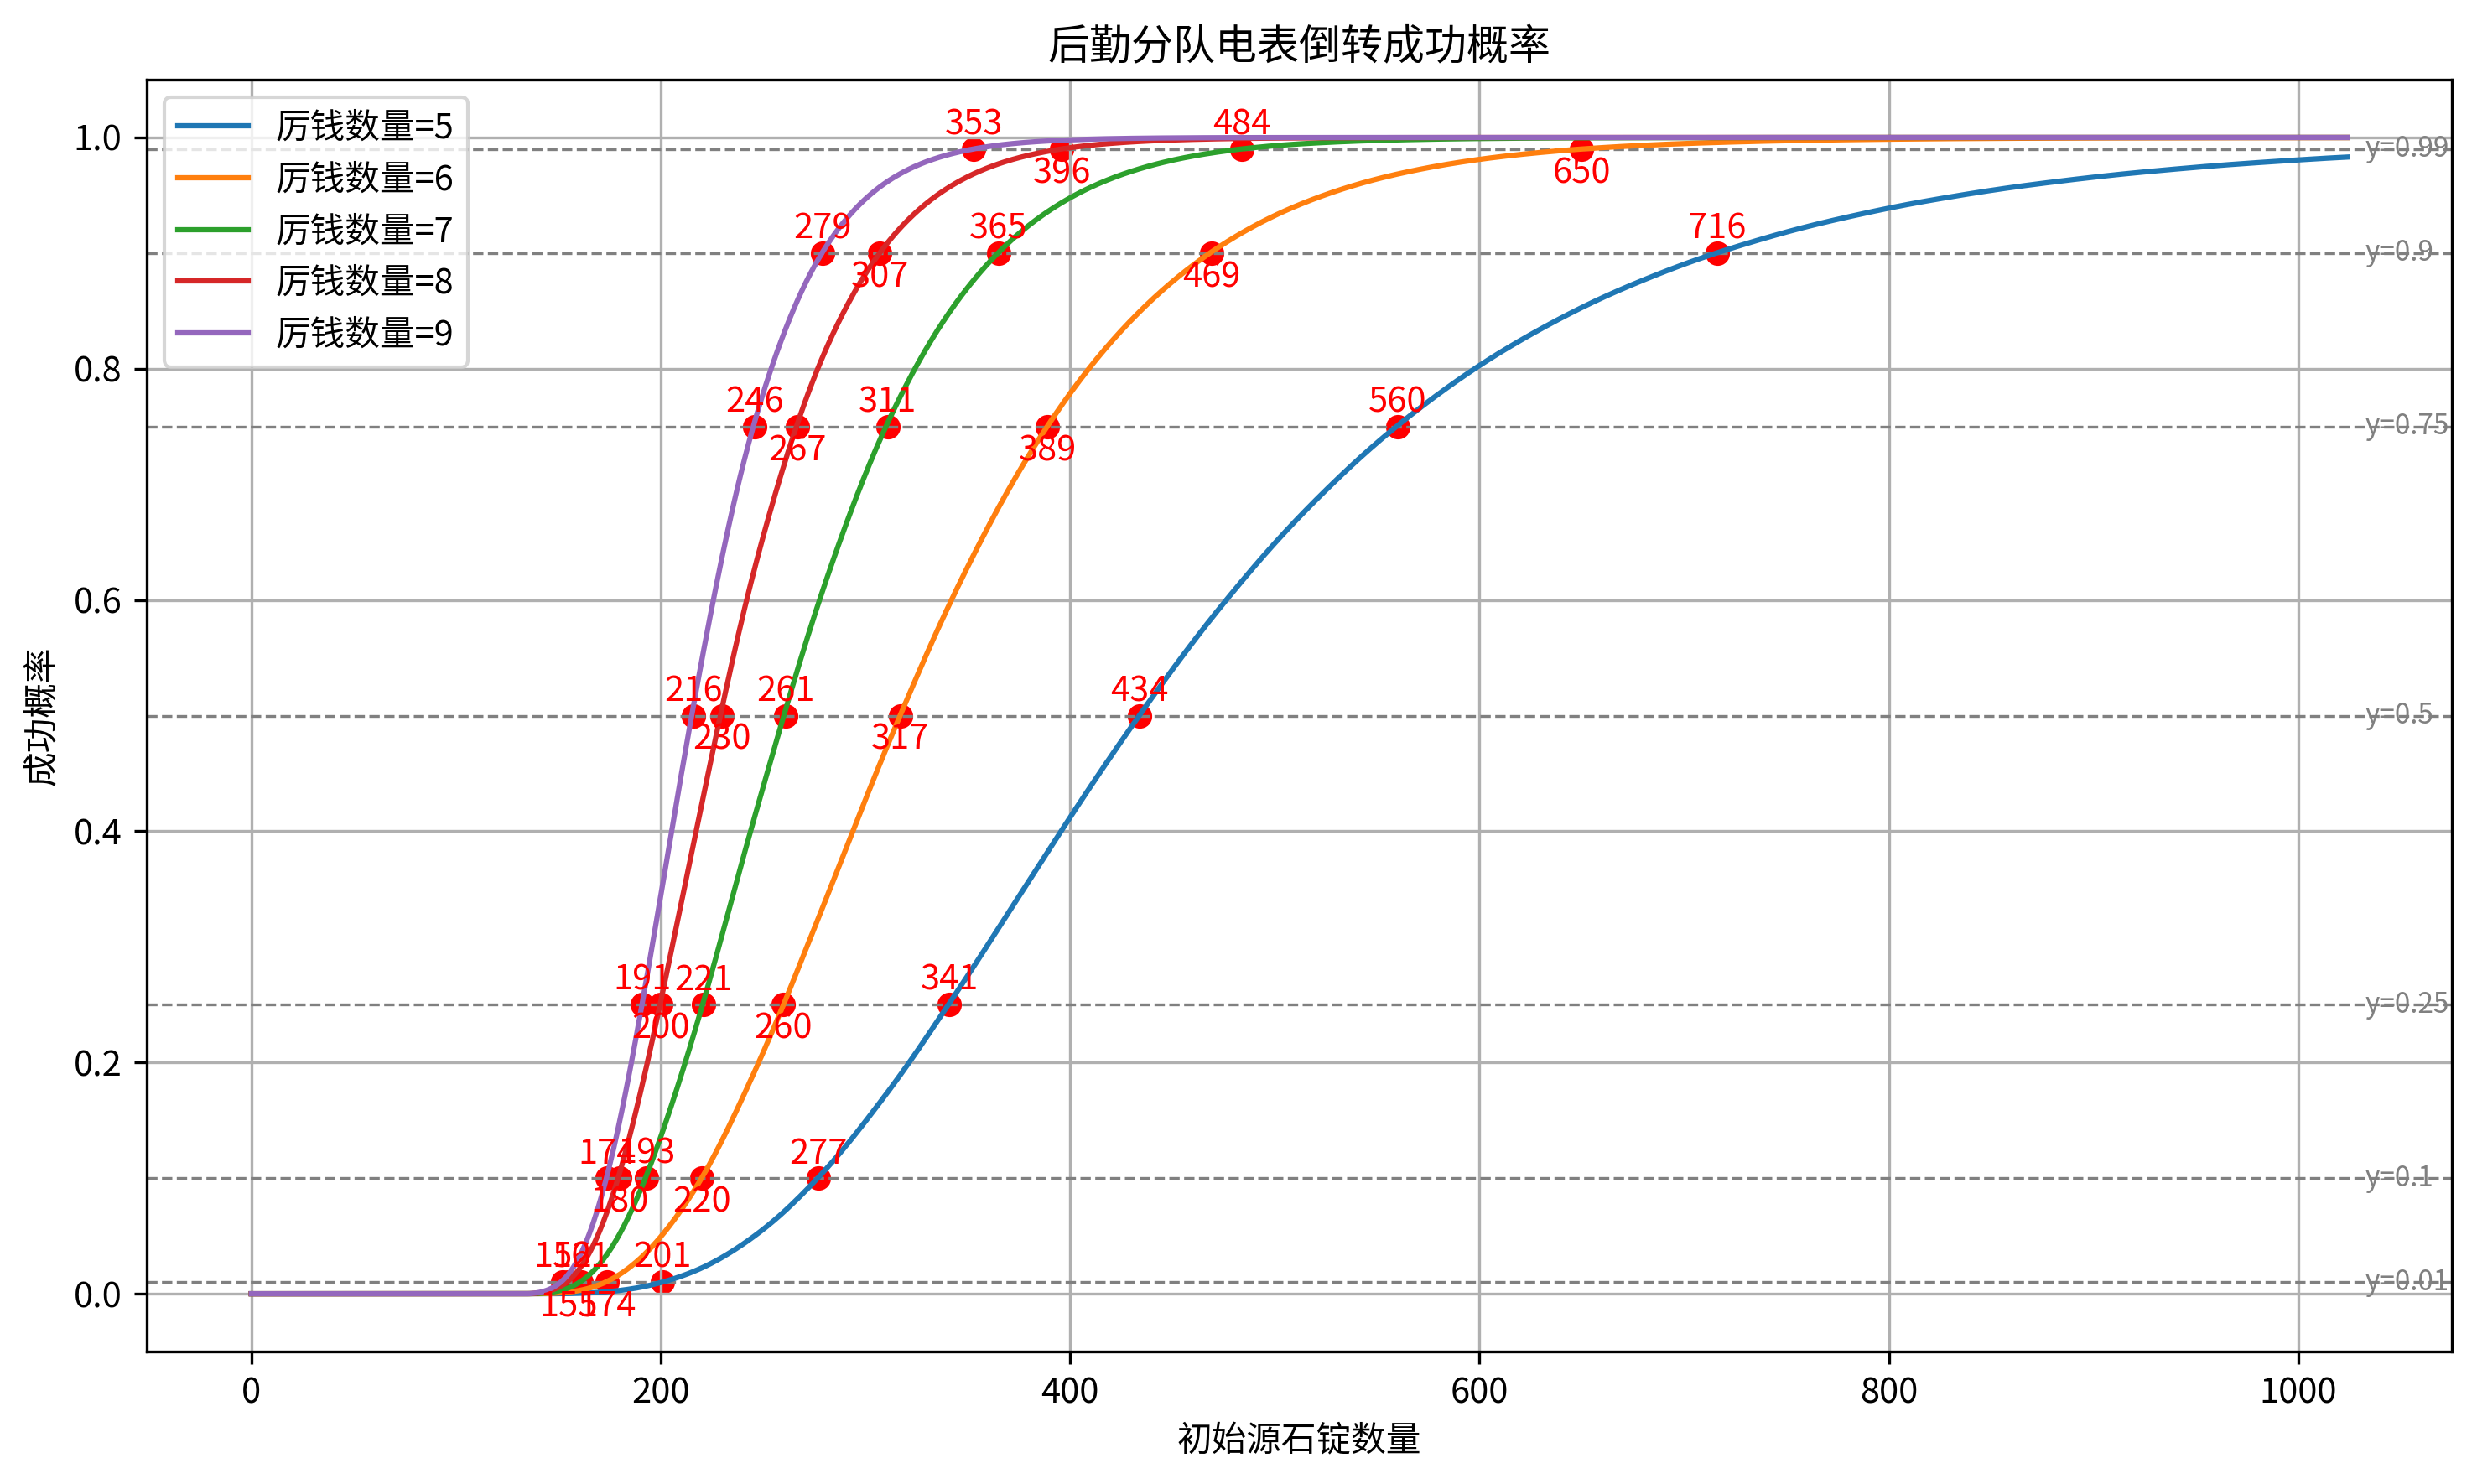

In [ ]:
from scipy.interpolate import make_interp_spline

df = pd.read_csv("后勤分队源石锭电表倒转概率.csv", index_col=["厉钱数量", "初始源石锭数量"])

fig, ax = plt.subplots(figsize=(10, 6))

# 绘制参考线
ref_lines = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
for y_ref in ref_lines:
    ax.axhline(y_ref, color='gray', linestyle='--', linewidth=0.8)
    ax.annotate(f'y={y_ref}', (1024, y_ref), xytext=(5, 0), textcoords='offset points', va='center', fontsize=8, color='gray')

for 厉钱数量 in range(5, 9+1):
    data = df.loc[厉钱数量]
    x = data.index.values
    y = data["成功概率"].values

    x_new = np.arange(0, 1024+1)
    spline = make_interp_spline(x, y)
    y_smooth = spline(x_new)
    ax.plot(x_new, y_smooth, label=f"厉钱数量={厉钱数量}")

    # 计算并标注所有交点
    for y_ref in ref_lines:
        idx = np.where(y_smooth >= y_ref)[0]
        if len(idx) > 0:
            x_cross = x_new[idx[0]]
            ax.scatter(x_cross, y_ref, color='red')
            # 奇数在上，偶数在下
            offset = (0, 2) if 厉钱数量 % 2 == 1 else (0, -2)
            va = 'bottom' if 厉钱数量 % 2 == 1 else 'top'
            ax.annotate(f"{x_cross}", (x_cross, y_ref), textcoords="offset points", xytext=offset, ha='center', va=va, fontsize=10, color='red')

ax.set_xlabel("初始源石锭数量")
ax.set_ylabel("成功概率")
ax.set_title("后勤分队电表倒转成功概率")
ax.legend(loc='upper left')
ax.grid(True)
fig.tight_layout()
plt.show()